# EVeMa 2018

![logo](assets/logo.jpg "Logo")

- Instructor: Žiga Emeršič.

- Authors: 
    - Saúl Calderón, Martín Solís, Ángel García, Blaž Meden, Felipe Meza, Juan Esquivel
    - Mauro Méndez, Manuel Zumbado. 

# Regularization and the Problem of Overfitting

With the introduction of Linear regression our goal was solely to fit the model as close to the data as possible. Now the question is whether this is OK or not. Will the model that is closely fitted to the training data perform well during testing stage or real life predictions?

In this section we try to solve this issue. However, having model that predicts well (firstly on training data of course) is surely also the good thing. This is in essence one of the most typical problems of machine learning: trying to train the model well for the actual, real (test) data, without knowing it. This means training the model well, but not too well in order to make it ready for test data. And figuring out where to draw the line depends on the data, the model and the domain we are working in. 

<!-- tu omeni primere – kaksen tovornjak itd., kako blizu so realni podatki in kako je v bistvu s samimi učnimi podatki - kako je pomembno, da so blizu pravi testni množici -->

Let us present the problem of overfitting and regularization through polynomial regression and some toy examples.


## Showcase of Overfitting on Polynomial Regression

In the figure below a toy example with made-up data is shown. Points are scattered in such way, that linear model (univariable linear model) clearly does not fit. No matter how we draw the line through the points, the distances to the data are always going to be large. Let us set x-axis as attribute values and y-axis as the class affiliation. The relation between the attribute and the class is therefore non-linear. 

<img src="files/2.1.plot.5.1.png" width="50%">

We can formulate the model with one variable as:

$$y = \theta_0 + \theta_1x$$

We can expand that by adding new attributes where each additional attribute is a power of the initial attribute, each multiplied with separate parameter. We can then formulate our model as:

$$ y = \theta_0 + \theta_1x + \theta_2x^2 + \dotsc + \theta_nx^n $$

Although it may not look like immediately, this model is still linear, because these power-values denote constant values from our data. We can replace these powers of $x$ with some arbitrary letter and what we are left with is just a linear sum of numbers.




What we did here was the expansion of our space of attributes with the power-values. Since we base our linear regression model on that, we name this polynomial regression. The effect of such expansion can be seen in the figures below.

The first plot shows polynomial expansion with the level of 2.
<img src="files/2.1.plot.5.2a.png" width="50%">

The second plot shows polynomial expansion with the level of 3.
<img src="files/2.1.plot.5.2b.png" width="50%">

If we set the polynomial level to the number of attributes $n-1$ we can get a perfectly fitting model. Furthermore, we totally minimized the criterion function, set it almost to zero. Is this good? Our goal was to minimize this function, so this surely must be a good thing?

<!-- Draw here on the board (or Sauls' fancy new touch computer) -->

However, although this looks a promising solution, such model is clearly overfitted (see drawn line on the blackboard). By fitting the curve we modeled the data well, but are far from acquiring something useful for prediction on test data. The fact that we managed to set the criterion function to effective zero does not help at all.

<!-- We  need to evaluate the model on new, evaluation data and evaluate fitting there. We can measure this using multiple measures. One of the most widely used measures is Root Mean Squared Error (RMSE). The measure is good because it outputs absolute values (we do not care whether the model predicted lower or higher value, but by how much). However, its output value is totally dependent on the domain. Acquiring RMSE of $e$, where data values are in ranges of $1000\times e$ is good, but acquiring $e$, where values range around $10\times e$ is not really useful. -->

## Fight Overfitting!

What solution do we have to fight overfitting? (we will learn about them on Day 3/Day 4).

Now to illustrate the problem of overfitting, let us observe toy data shown in table below:

<table>
    <tr>
        <th>k</th><th>train</th><th>test</th>
    </tr>
    <tr>
        <td>0</td><td>0.01</td><td>0.00</td>
    </tr>
    <tr>
        <td>1</td><td>0.04</td><td>0.05</td>
    </tr>
    <tr>
        <td>2</td><td>0.11</td><td>0.10</td>
    </tr>
    <tr>
        <td>3</td><td>0.61</td><td>0.53</td>
    </tr>
    <tr>
        <td>4</td><td>0.87</td><td>0.66</td>
    </tr>
    <tr>
        <td>5</td><td>0.89</td><td>0.69</td>
    </tr>
    <tr>
        <td>6</td><td>0.90</td><td>0.32</td>
    </tr>
    <tr>
        <td>7</td><td>0.91</td><td>0.19</td>
    </tr>
    <tr>
        <td>8</td><td>0.92</td><td>0.15</td>
    </tr>
</table>


With increasing the polynomial level we gradually increase the accuracy on the training data. However, at some point the model is going to break and the prediction accuracy is going to drop during testing. We need some kind of prevention system for that - we want to decrease the influence the parameters of higher powers have. In other words, we want to punish overly complex models!

If we start by using linear regression we have seen earlier, we can solve this by introducing regularization part to the initial equation for linear regression:

$$ E(\vec{w}) = \frac{1}{2N}\sum_{n=1}^{N}\{y(x_n,\vec{w}) - t_n\}^2 + \frac{\lambda}{2}\|\vec{w}\|^2 $$

We use the power of 2, simply because we do not care whether the value is positive or negative. For the level of parameter $\eta$ we typically select low values of $0.1$ to $0.0001$ etc. If values of $\eta$ are set correctly this type of regularization completely prevents overfitting.

To train the model (to define the value of parameters $\theta_j$) we calculate gradient in the same way we did for linear regression, we only add the derivative of the regularization part and calculate the derivative as:

$$ \frac{\partial}{\partial \vec{w}}E(\vec{w}) = \frac{1}{N}\sum_{n=1}^{N}\{y(x_n,\vec{w}) - t_n\} + \lambda\vec{w} $$

We can use regularization in CNNs as well (will learn about it in Day 3 and Day 4). In CNNs regularization prevents weights from overfitting.

! DO NOT FORGET ABOUT UNDERFITTING !


## The Example

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures

101


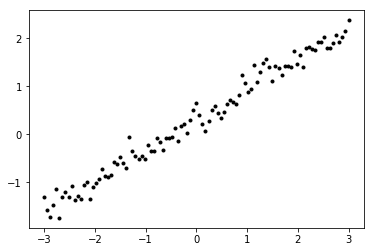

101


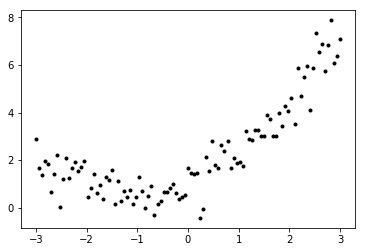

In [116]:
dataLin = np.loadtxt("files/data-a.txt")
xLin    = dataLin[:, [0]]
yLin    = dataLin[:, [1]]

print(len(xLin))
plt.figure()
plt.plot(xLin, yLin, "k.")
plt.show()

data = np.loadtxt("files/data-b.txt")
x    = data[:, [0]]
y    = data[:, [1]]

print(len(x))
plt.figure()
plt.plot(x, y, "k.")
plt.show()

The value of remainders is $y_i - h(\vec{x}_i)$. The better the model fits the data, the less connected the dependent variable and the remainder will be.

In [144]:
def plot_fit_residual(x, y, yp):

    # Model
    fig, axes  = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
    axes.plot(x.ravel(), y.ravel(), "k.",  label="Data")
    axes.plot(x.ravel(), yp.ravel(), "g-", label="Model h(x)")
    axes.set_xlabel("x")
    axes.set_ylabel("y")
    axes.legend(loc=4)

    plt.show()
    
# Function that will plot a distribution of parameters used
def plot_coefficients(coef):
    coef=coef.ravel()
    D = len(coef)
    plt.title("Parametri modela")
    plt.bar(np.arange(D), coef)
    plt.xticks(np.arange(D))
    plt.grid()
    plt.ylabel("beta")
    plt.xlabel("d")
    plt.show()

[2.30897595] [[0.85614271]]


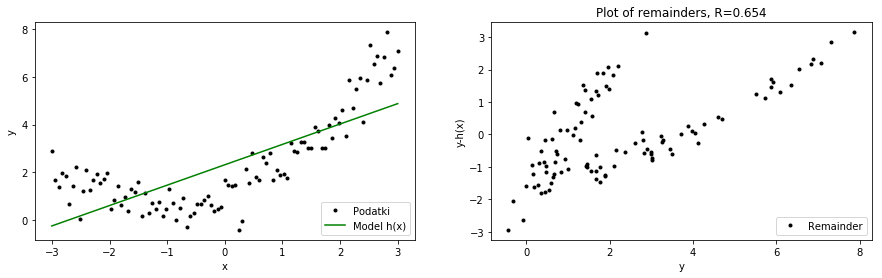

In [141]:
# Train the model
model = LinearRegression()
model.fit(x, y)

print(model.intercept_,model.coef_)

# Prediction
hx = model.predict(x)

plot_fit_residual(x, y, hx)

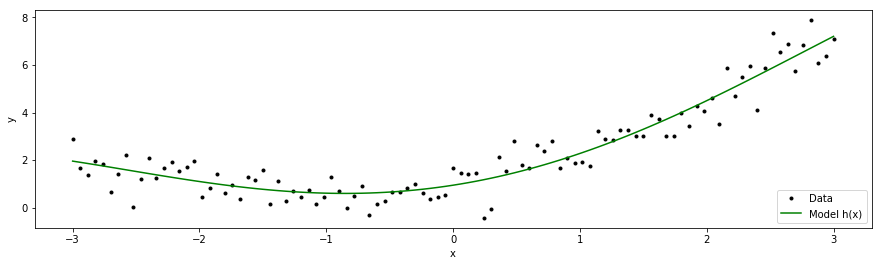

In [147]:
D = 5 # polynom level - let's change this!
X = np.zeros((len(x), D))
#print(X)
for d in range(0, D):
    X[:, d] = x.ravel()**d
#print(X)
model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(x, y, hx)
#plot_coefficients(model.coef_)

## Punish Too-Complex Models

In addition to minimizing the mean square error, we can also penalize the complexity of the models when looking for a solution. Therefore, we want the parameters found in the geometric sense to be as small as possible. This procedure is also known as regularization. The degree of regularization is monitored by the parameter $\lambda$ (in literature also $\eta$ and $\alpha$), which is defined by the users. The two most common models are:

Regression Lasso
"Punishment of the Manhattan distance of the vector $\vec{\beta}$ from the baseline"

$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2 + \alpha \|\vec{\beta}\| $$
: returns sparse parameter vectors $\vec{\beta}$. Most of the components $\beta_j$ will be 0 - !

Ridge regression never zeros out coefficients, so you either end up without parameters or include all of them.

Lasso does both parameter shrinkage and variable selection automatically. However, if some attributes are highly correlated, ElasticNet could be a better option.

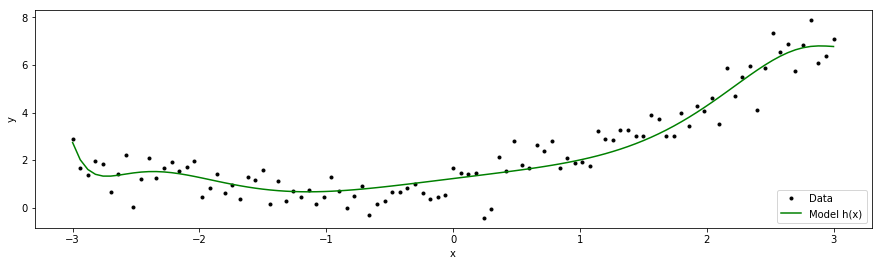

In [146]:
import warnings
warnings.filterwarnings("ignore") # not a good practice, but just for the ConvergenceWarning

D = 20

# Create space
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = Lasso(alpha=0.1)
#model = Ridge(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
#plot_coefficients(model.coef_)

Some of the code by our colleague Rok Gomiscek.

Authors: *Saul Calderon, Angel García, Blaz Meden, Felipe Meza, Juan Esquivel, Martín Solís, Ziga Emersic, Mauro Mendez, Manuel Zumbado*